In [1]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv("kc_house_data.csv")

In [3]:
#the id,date, column no need for analysis so drop it
df1=df.drop(['id','date','yr_built','yr_renovated', 'zipcode'],axis=1)

In [4]:
df1.head(5)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,47.6168,-122.045,1800,7503


In [5]:
df1.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df1)

# statistics of scaled data
pd.DataFrame(data_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04
mean,-3.682080e-17,2.367051e-16,-1.788439e-16,2.419652e-16,1.052023e-17,-3.156068e-17,-5.260114e-18,-1.052023e-17,-2.577456e-16,2.524855e-16,1.104624e-16,6.838148e-17,-3.432290e-14,-3.667614e-14,8.153176e-17,-2.893063e-17
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-1.266860e+00,-3.624404e+00,-2.745920e+00,-1.948891e+00,-3.521759e-01,-9.154270e-01,-8.717263e-02,-3.057595e-01,-3.702668e+00,-5.663344e+00,-1.809494e+00,-6.586810e-01,-2.916795e+00,-2.166543e+00,-2.316325e+00,-4.438052e-01
25%,-5.941897e-01,-3.987371e-01,-4.736214e-01,-7.108948e-01,-2.430487e-01,-9.154270e-01,-8.717263e-02,-3.057595e-01,-6.291869e-01,-5.588357e-01,-7.226314e-01,-6.586810e-01,-6.426977e-01,-8.102505e-01,-7.244971e-01,-2.808593e-01
50%,-2.453924e-01,-3.987371e-01,1.756067e-01,-1.849914e-01,-1.808075e-01,1.053939e-02,-8.717263e-02,-3.057595e-01,-6.291869e-01,-5.588357e-01,-2.758102e-01,-6.586810e-01,8.478232e-02,-1.143518e-01,-2.138280e-01,-1.885636e-01
75%,2.857709e-01,6.764851e-01,5.002207e-01,5.118578e-01,-1.066880e-01,9.365058e-01,-8.717263e-02,-3.057595e-01,9.075535e-01,2.919156e-01,5.091458e-01,6.066704e-01,8.512345e-01,6.312541e-01,5.448802e-01,-9.835556e-02
max,1.950299e+01,3.185793e+01,7.641730e+00,1.247807e+01,3.950434e+01,3.714405e+00,1.147149e+01,4.914129e+00,2.444294e+00,4.545672e+00,9.204044e+00,1.023238e+01,1.570054e+00,6.383070e+00,6.162239e+00,3.144029e+01


In [7]:
# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=3, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(n_clusters=3)

In [8]:
# inertia on the fitted data
kmeans.inertia_

248121.9175392067

f:\pthon_env\penv\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
f:\pthon_env\penv\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
f:\pthon_env\penv\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
f:\pthon_env\penv\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
f:\pthon_env\penv\lib\site-packages\skle

Text(0, 0.5, 'Inertia')

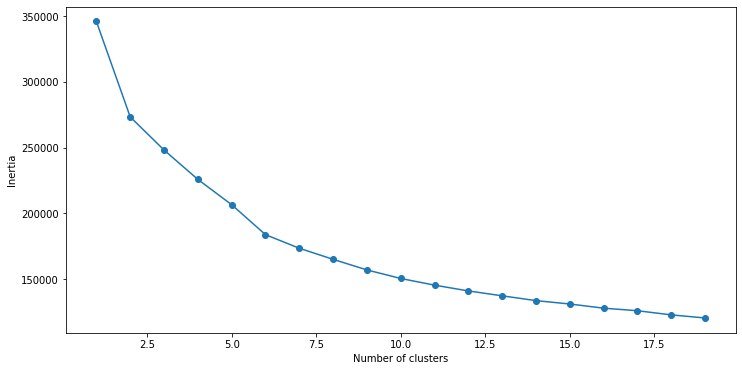

In [9]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [10]:
# k means using 6 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 6, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

f:\pthon_env\penv\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [11]:
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    8047
0    6209
5    4405
3    2436
4     353
2     163
Name: cluster, dtype: int64

In [16]:
value=frame['cluster'].value_counts()

In [12]:
ID=np.array(df['id'])
Prediction=np.array(pred)

In [13]:
val=np.hstack((ID[:,np.newaxis],Prediction[:,np.newaxis]))
val

array([[7129300520,          1],
       [6414100192,          0],
       [5631500400,          1],
       ...,
       [1523300141,          1],
       [ 291310100,          0],
       [1523300157,          1]], dtype=int64)

In [15]:
#downloading the csv file which contaning the ID and the predicted values
from pandas import DataFrame
    
df = DataFrame(val, columns= ['ID','House type'])
export_csv = df.to_csv (r'F:\cluster_house12.csv', index = None, header=True)

In [17]:
import pickle
pickle.dump(value,open('sample.pkl','wb'))